In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, anderson, shapiro, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/creditcard_2023.csv')

In [4]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


The data has aready in normal distribution except "amount" (idk why dont they do it)

In [7]:
df.drop(columns=['id'],inplace=True)

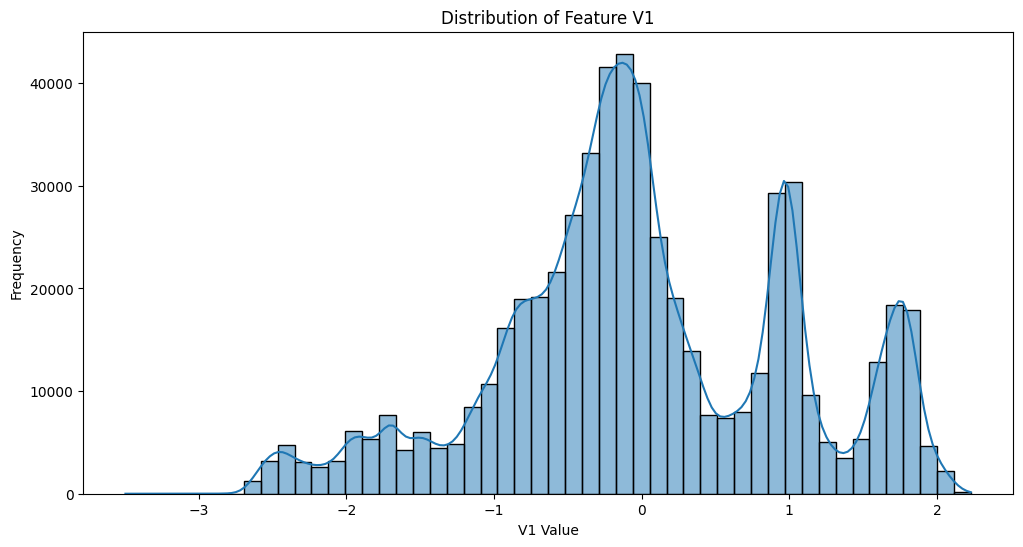

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['V1'], bins=50, kde=True)
plt.title('Distribution of Feature V1')
plt.xlabel('V1 Value')
plt.ylabel('Frequency')
plt.show()

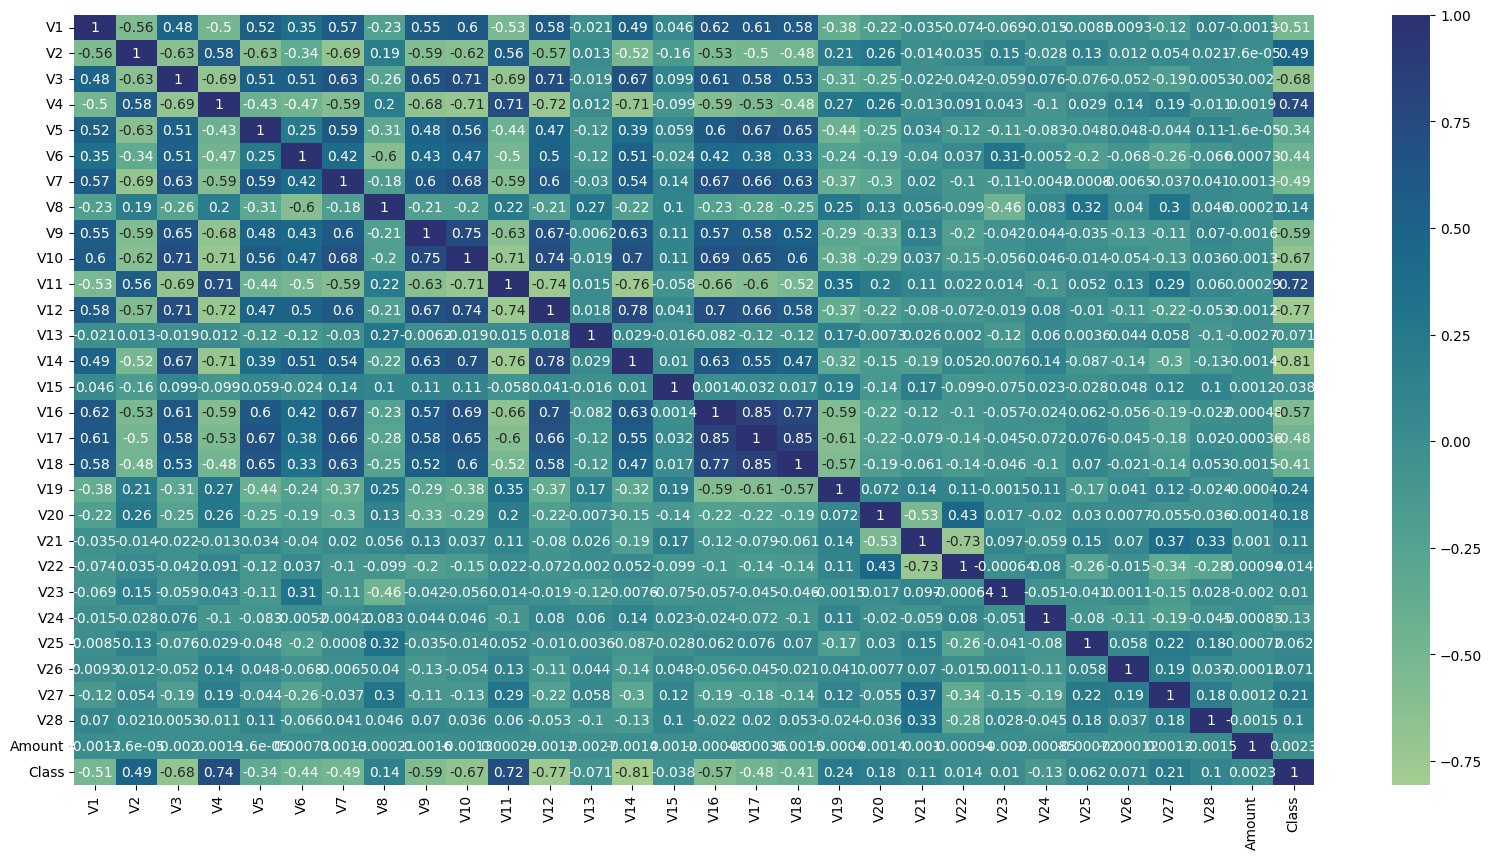

In [9]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),cmap='crest',annot=True)
plt.show()

In [10]:
def find_outlier_indices(data_series, method='z-score', z_score_threshold=3,
    outlier_multiplier=1.5):
    # using z-score
    if method == 'z-score':
        # Calculate the Z-scores for the data series
        z_scores = (data_series - data_series.mean()) / data_series.std()

        # Find the indices where the absolute Z-score exceeds the threshold
        outlier_indices = z_scores[abs(z_scores) > z_score_threshold].index.tolist()

        if len(outlier_indices) > 0:
            return {
                'index': outlier_indices,
                'z-score': z_scores[outlier_indices].round(2).tolist()
            }
        else:
            return None

    # using quantile
    elif method == 'IQR':
        # Calculate quartiles
        Q1 = data_series.quantile(0.25)
        Q3 = data_series.quantile(0.75)

        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for identifying outliers
        lower_bound = Q1 - outlier_multiplier * IQR
        upper_bound = Q3 + outlier_multiplier * IQR
        outlier_indices = data_series[
            (data_series < lower_bound) | (data_series > upper_bound)
        ].index.tolist()

        if len(outlier_indices) > 0:
            return {
                'index': outlier_indices,
                'IQR_diff': data_series[outlier_indices].apply(
                    lambda x: x - lower_bound if x < lower_bound else x - upper_bound
                ).tolist(),
            }
        else:
            return None

In [12]:
column = df.columns.values
column

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'], dtype=object)

In [13]:
outlier_mapping = {
    col: find_outlier_indices(df[col], method='IQR')
    for col in df
}

# Extract outlier indices from the dictionary and flatten the list
outlier_indices = sum(
    [item['index'] for _, item in outlier_mapping.items() if item is not None],
    []
)

# Print the number of outliers detected for each feature
print(f'Number of outliers per factor:')
pd.DataFrame(
    {
        col: [len(item['index'])] if item is not None else 0
        for col, item in outlier_mapping.items()
    }
).transpose() \
    .reset_index() \
    .rename(columns={'index': 'Feature', 0: 'Number of outlier detected'}) \
    .sort_values(['Number of outlier detected'], ascending=False)

Number of outliers per factor:


,Feature,Number of outlier detected
7,V8,93856
26,V27,82235
22,V23,72056
4,V5,71015
27,V28,70242
19,V20,65708
20,V21,57138
6,V7,55997
5,V6,48854
1,V2,43620


In [23]:
def make_qq_plot(df, col, ax):
    '''
    Makes normal Q-Q plot and calculates normality statistics and skew.
    '''
    probplot(df[col], plot=ax)
    
    ax.get_lines()[0].set_color('#2074F0')
    ax.get_lines()[0].set_markerfacecolor('white')
    ax.get_lines()[0].set_markeredgewidth(0.50)
    ax.get_lines()[1].set_linewidth(0.75)
    ax.get_lines()[1].set_color('#DA0722')
    ax.set_xlabel(f'Theoretical Quantile ({col})')
    ax.set_ylabel(f'Data Quantile ({col})')
    ax.set_title(None)

    # Calculate normality test statistics and skew
    n_sample = 1000 if df.shape[0] > 1000 else df.shape[0]
    anderson_sol = anderson(df[col].sample(n=n_sample, random_state=42))
    anderson_res = 'pass' \
        if anderson_sol.statistic < anderson_sol.critical_values[2] \
            else 'fail'

    shapiro_sol = shapiro(df[col].sample(n=n_sample, random_state=42))
    shapiro_res = 'pass' if shapiro_sol.pvalue > 0.05 else 'fail'

    skew_sol = skew(df[col].sample(n=n_sample, random_state=42))
    skew_res = 'symmetric' if abs(skew_sol) < 0.30 else 'asymmetric'

    match int(anderson_sol.statistic < anderson_sol.critical_values[2]) \
        + int(shapiro_sol.pvalue > 0.05) + int(abs(skew_sol) < 0.30):
        case 3:
            annotation_color = '#008744'
        case 2:
            annotation_color = '#FF9600'
        case 1:
            annotation_color = '#FF9600'
        case 0:
            annotation_color = '#D62D20'

    # Show normality test statistics and skew
    ax.set_title(
        f'W\u03b1 = {shapiro_res} | A\u03b1 = {anderson_res} | skew = {skew_res}',
        size=11,
        loc='left',
        color=annotation_color,
    )

def make_box_plot(df, col, ax):
    '''
    Makes box plot.
    '''
    sns.boxplot(y=df[col], width=0.25, color='#2074F0', ax=ax)

    ax.set_xlabel(None)
    ax.set_ylabel(col)


def make_univariate_plots(df, factors, title=None, plot_type='qq-plot',
    dim=None, max_col=3, size=(5.00, 3.75)):
    '''
    Create tiles of univariate plots.
    '''
    # Handle plot layout (number of columns and row and figure size)
    # factors = factors if isinstance(factors, list) else [factors]
    if dim is None or np.prod(dim) < len(factors):
        n = int(np.ceil(np.sqrt(len(factors))))
        m = int(np.ceil(min(n, len(factors)/n)))

        if n > max_col:
            n, m = max_col, int(np.ceil(max(max_col, len(factors)/max_col)))

    _, ax = plt.subplots(m, n, figsize=(size[0]*n, size[1]*m), tight_layout=True)

    # Add plot title
    plt.suptitle(title, y=1.00)

    # Make each Q-Q plot and normality and skew tests
    for i in range(m):
        for j in range(n):
            ix = i*n + j
            ax_ix = ax.flatten()[ix] if len(factors) > 1 else ax
            if ix >= len(factors):
                ax_ix.set_axis_off()
            else:
                
                match plot_type:
                    
                    case 'qq-plot':
                        make_qq_plot(df=df, col=factors[ix], ax=ax_ix)
                    case 'box-plot':
                        make_box_plot(df=df, col=factors[ix], ax=ax_ix)
                    case _:
                        make_qq_plot(df=df, col=factors[ix], ax=ax_ix)
    plt.show()


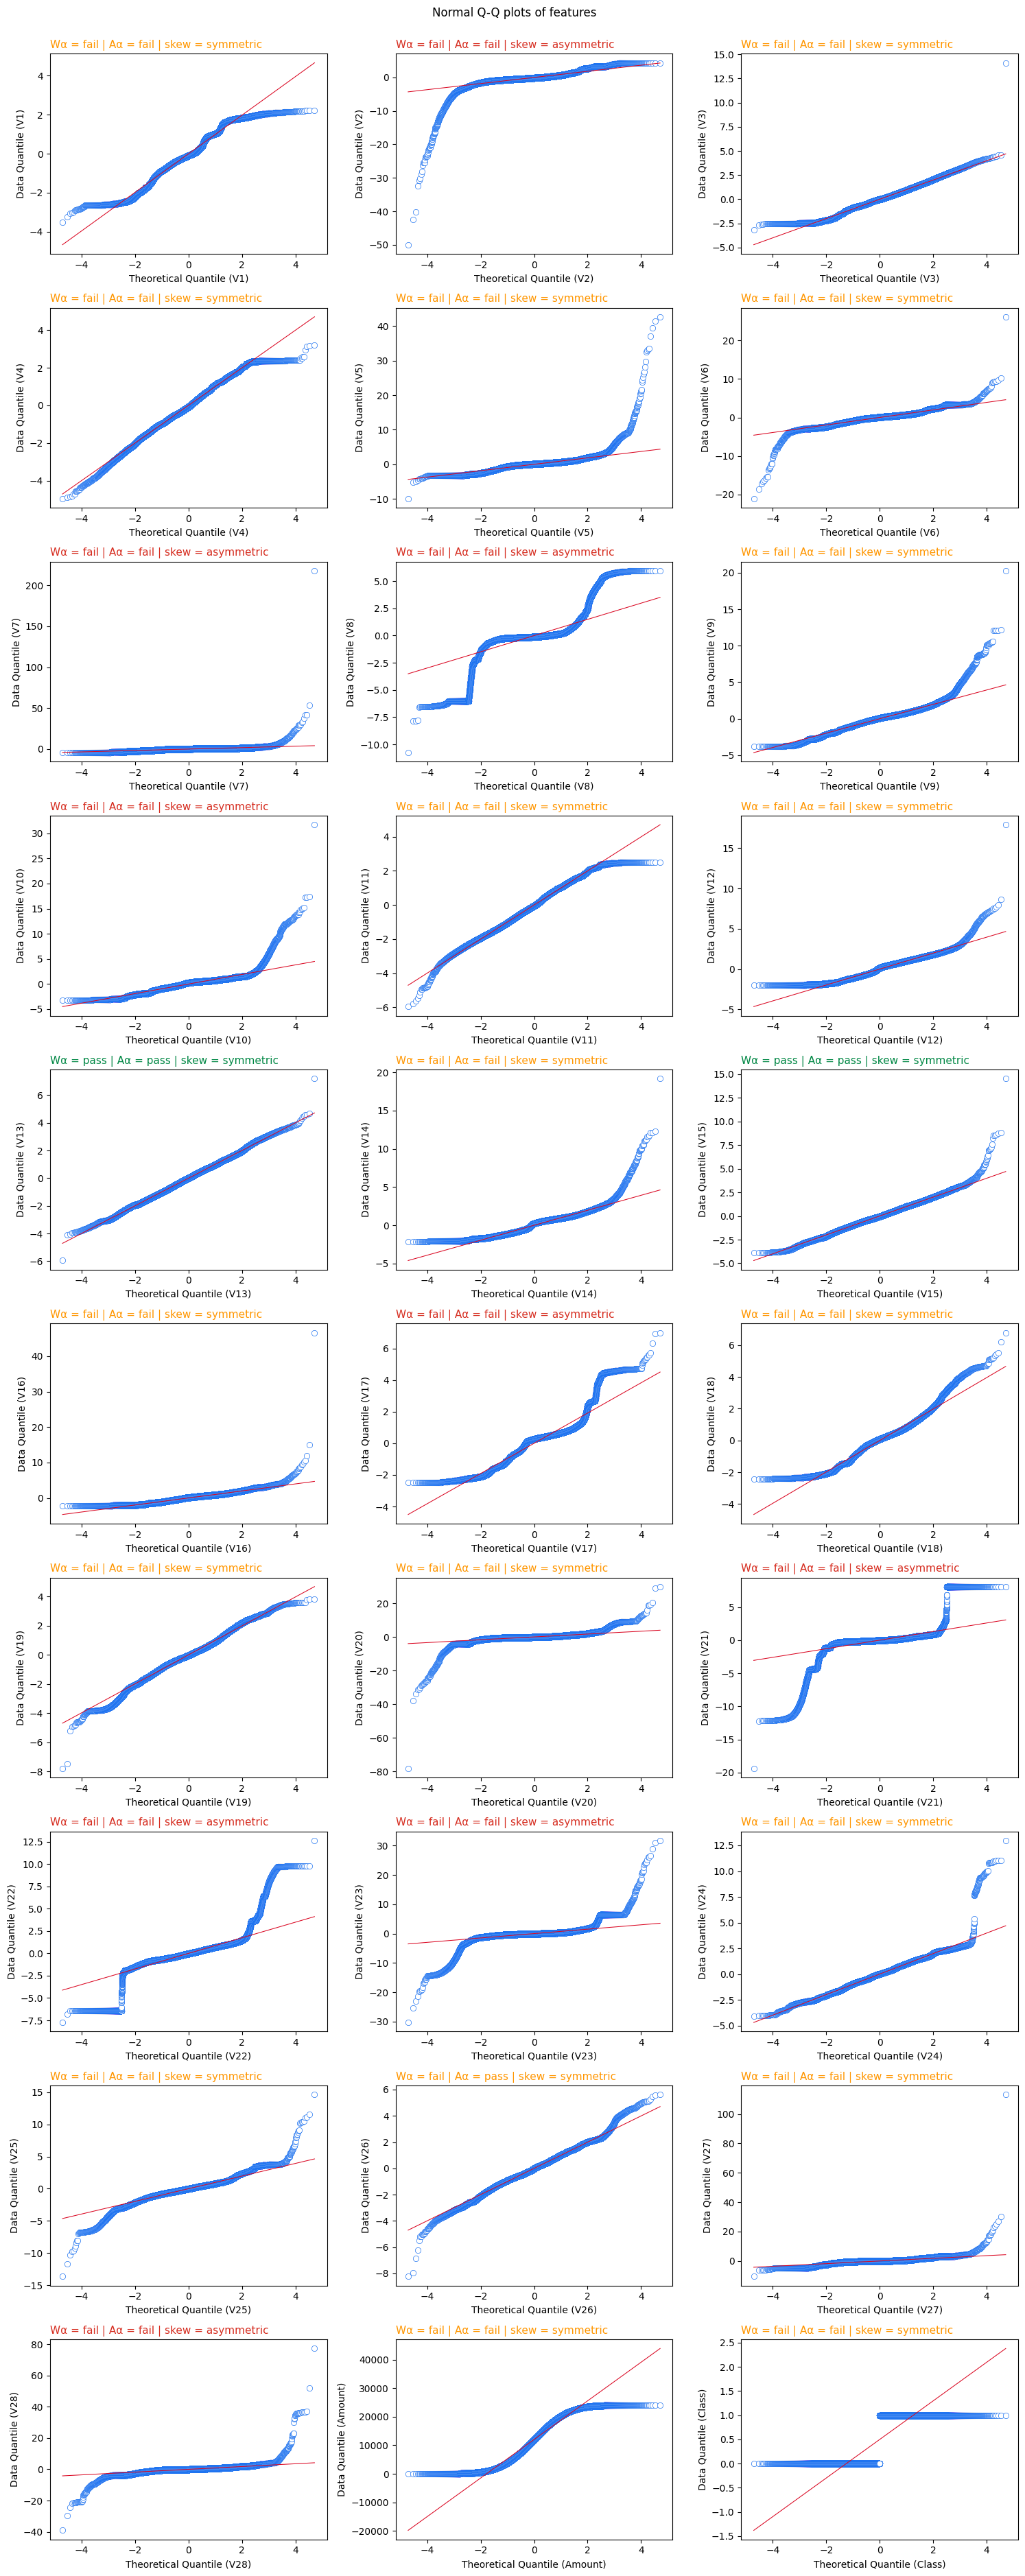

In [24]:
make_univariate_plots(
    df = df,
    factors = column,
    title = 'Normal Q-Q plots of features',
    plot_type = 'qq-plot',
)

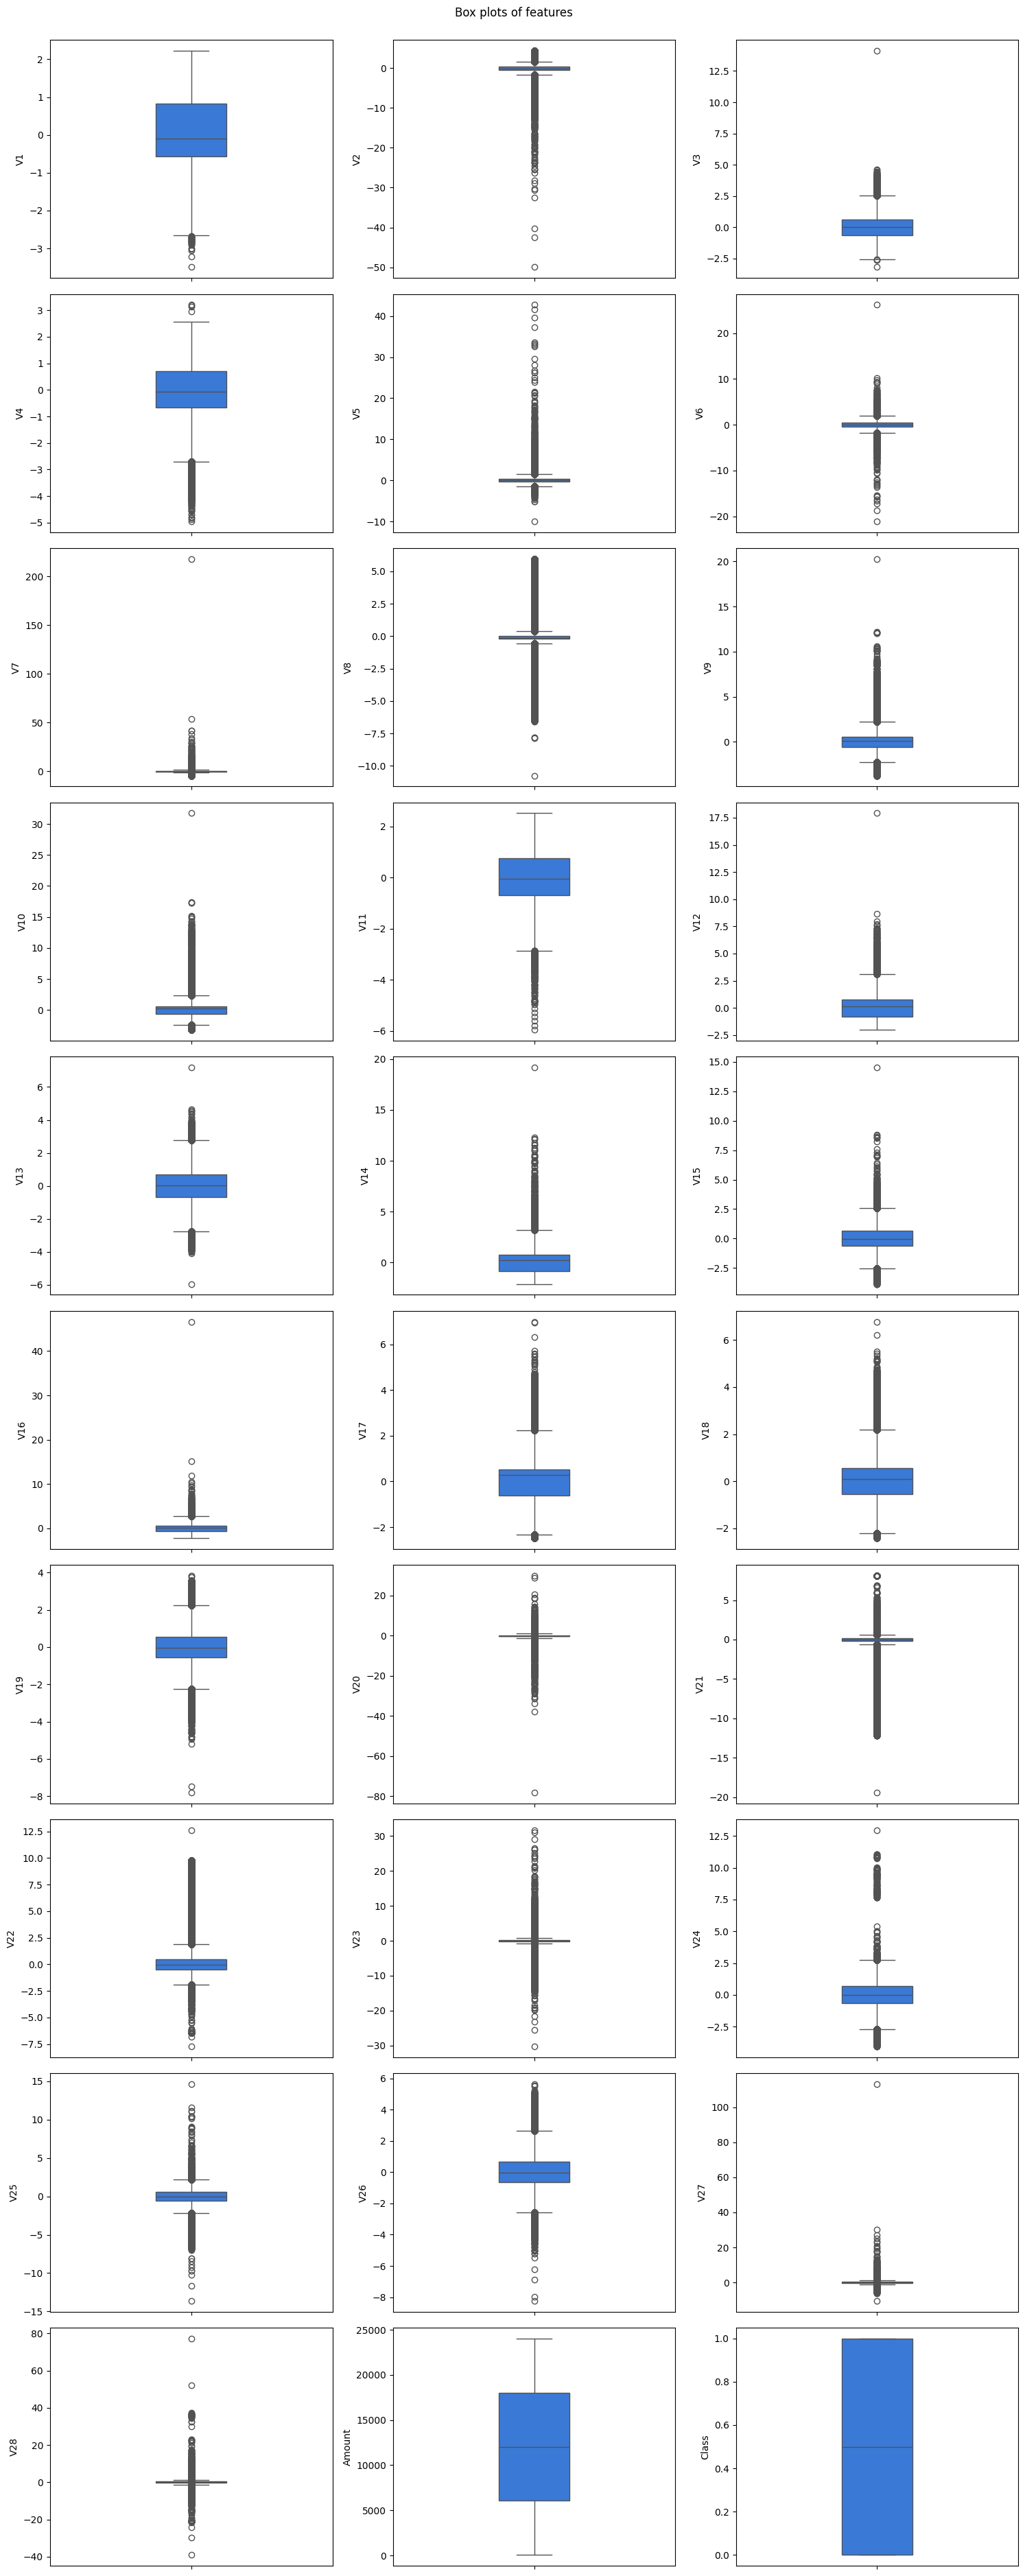

In [25]:
make_univariate_plots(
    df=df,
    factors=column,
    title='Box plots of features',
    plot_type='box-plot',
)

In [29]:
X = df[column[:-1]]
y = df['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
train_dataset = np.concatenate([X_train, y_train.values.reshape(-1,1)],axis=1)
test_dataset  = np.concatenate([X_test , y_test.values.reshape(-1,1)],axis=1)

In [42]:
train_dataset = pd.DataFrame(train_dataset, columns=column)
test_dataset = pd.DataFrame(test_dataset, columns=column)

In [43]:
train_dataset.to_csv('data/train_dataset.csv')
test_dataset.to_csv('data/test_dataset.csv')